In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [3]:
# BALOCHISTAN : 

Saving Balochistan_Updated.csv to Balochistan_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64   

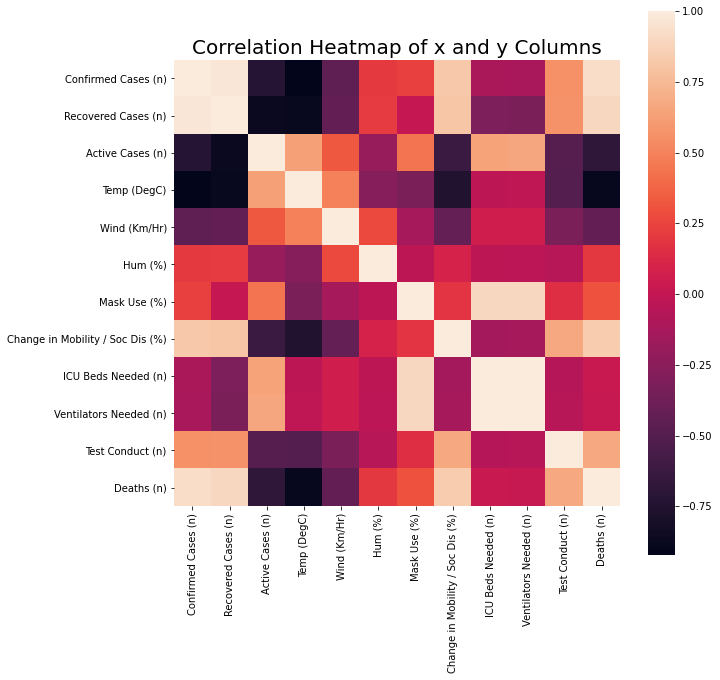

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.971606,-0.731669,-0.921350,-0.442003,0.206148,0.231605,0.824939,-0.116227,-0.122985,0.559908,0.926089
Recovered Cases (n),0.971606,1.000000,-0.872070,-0.879319,-0.430743,0.216003,0.014095,0.808001,-0.307666,-0.316495,0.570603,0.900932
Active Cases (n),-0.731669,-0.872070,1.000000,0.628721,0.328187,-0.195429,0.437187,-0.624975,0.645185,0.656631,-0.489487,-0.683149
Temp (DegC),-0.921350,-0.879319,0.628721,1.000000,0.491419,-0.273958,-0.316199,-0.750611,-0.027236,-0.018718,-0.495507,-0.884241
Wind (Km/Hr),-0.442003,-0.430743,0.328187,0.491419,1.000000,0.266283,-0.133099,-0.423363,0.065880,0.068795,-0.316409,-0.432445
Hum (%),0.206148,0.216003,-0.195429,-0.273958,0.266283,1.000000,-0.027212,0.094693,-0.021038,-0.032706,-0.050854,0.198134
Mask Use (%),0.231605,0.014095,0.437187,-0.316199,-0.133099,-0.027212,1.000000,0.186242,0.897207,0.900692,0.155130,0.303234
Change in Mobility / Soc Dis (%),0.824939,0.808001,-0.624975,-0.750611,-0.423363,0.094693,0.186242,1.000000,-0.136465,-0.133152,0.669888,0.838708
ICU Beds Needed (n),-0.116227,-0.307666,0.645185,-0.027236,0.065880,-0.021038,0.897207,-0.136465,1.000000,0.999329,-0.059765,0.031446
Ventilators Needed (n),-0.122985,-0.316495,0.656631,-0.018718,0.068795,-0.032706,0.900692,-0.133152,0.999329,1.000000,-0.055879,0.021465


In [4]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_baloc = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_baloc.info());
print('\n')
print(df_baloc.describe())

dff = df_baloc.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [5]:
# data pre processing 

x = df_baloc.iloc[:, 2:-1]
y = df_baloc.iloc[:, -1] 

x = x.drop(['Hum (%)','ICU Beds Needed (n)','Ventilators Needed (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 8)
y data shape :  (183,)


x-train data shape :  (146, 8)
x-test data shape :  (37, 8)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [6]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [164 165 165 165 166 166 167 169 169 169 169 169 169 169 170 171 173 173
 175 175 175 176 176 177 179 179 179 179 179 181 181 181 182 182 182 182
 183]

 Predicted-y using lin reg: 
 [152.09 151.86 151.54 151.64 150.71 150.77 150.9  150.9  150.85 150.64
 150.88 150.84 150.46 150.9  151.23 151.29 151.63 151.76 151.81 151.85
 152.   152.27 152.25 152.15 152.48 152.53 152.33 153.05 153.12 153.23
 153.05 153.57 153.66 154.01 154.84 155.09 154.76]

Accuracy obt from lin reg model :  88.0  %


In [7]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 1s 1ms/step - loss: 72.5225 - mean_squared_error: 15078.0529
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 30.9526 - mean_squared_error: 1189.8529
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 17.2614 - mean_squared_error: 580.0044
Epoch 4/250
30/30 [===================

In [8]:
ypred = model.predict(xts)

ya_baloc = np.array(yts)
yp_baloc = np.array(ypred)

print('\nya_baloc ~vs~ yp_baloc')
for i in range(len(yts)): 
  print(ya_baloc[[i]],'vs',yp_baloc[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_baloc[i]-yp_baloc[i])/ya_baloc[i])

err_baloc = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_baloc,2))*100,' %')


ya_baloc ~vs~ yp_baloc
[164] vs [162.28494]
[165] vs [162.59578]
[165] vs [163.16794]
[165] vs [163.17699]
[166] vs [164.1354]
[166] vs [164.44304]
[167] vs [164.37933]
[169] vs [164.73026]
[169] vs [165.86835]
[169] vs [168.27393]
[169] vs [169.98755]
[169] vs [172.94852]
[169] vs [173.94902]
[169] vs [173.55208]
[170] vs [174.54861]
[171] vs [176.29108]
[173] vs [176.60843]
[173] vs [178.39673]
[175] vs [180.40762]
[175] vs [179.58136]
[175] vs [180.25159]
[176] vs [179.02145]
[176] vs [180.09528]
[177] vs [181.35298]
[179] vs [180.53217]
[179] vs [181.65479]
[179] vs [181.02011]
[179] vs [179.3212]
[179] vs [178.0441]
[181] vs [177.1011]
[181] vs [176.14929]
[181] vs [175.62122]
[182] vs [174.17883]
[182] vs [172.28592]
[182] vs [170.61002]
[182] vs [170.55148]
[183] vs [171.26852]

Accuracy obt from deep nueral network :  98.0  %


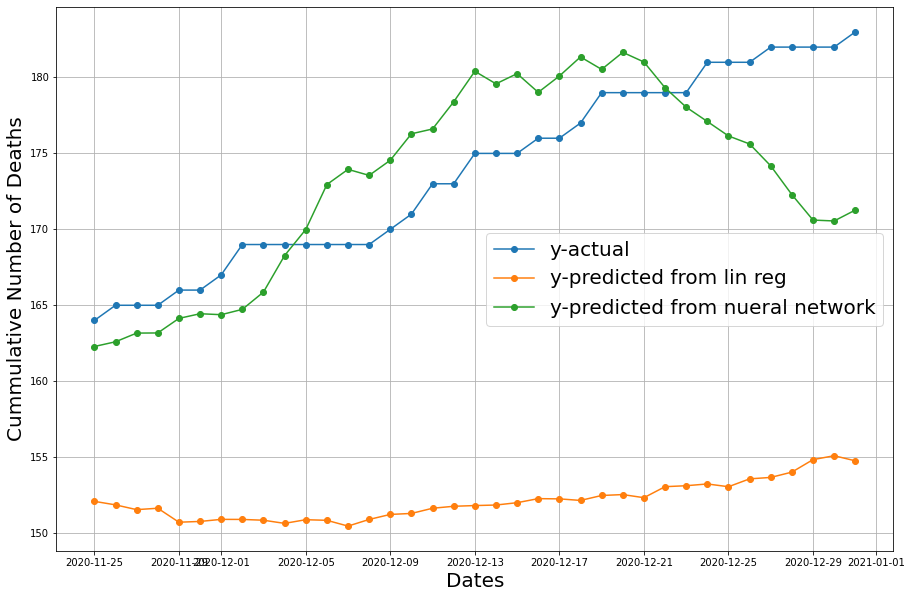

In [9]:
dts = df_baloc['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_baloc, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_baloc, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [10]:
# PUNJAB : 

Saving Punjab_Updated.csv to Punjab_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64       
 10  

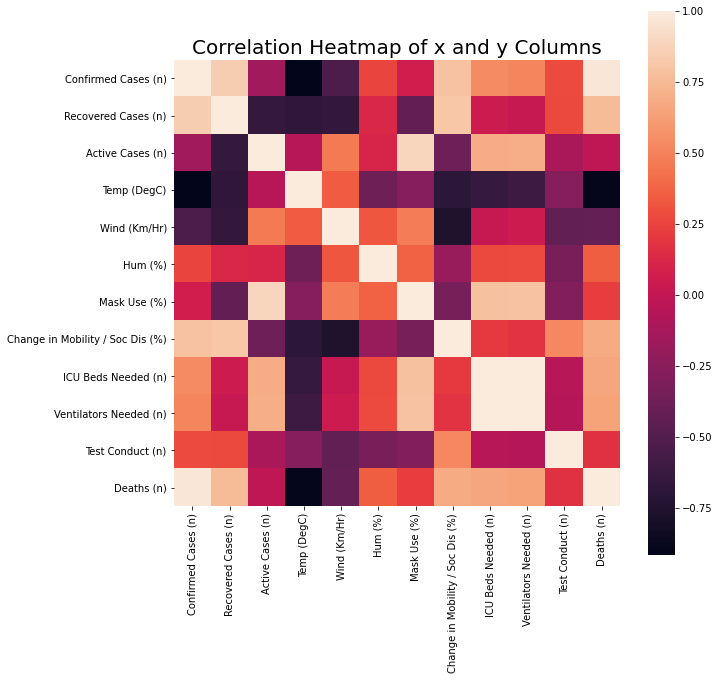

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.848263,-0.150135,-0.914181,-0.531094,0.257816,0.072120,0.797337,0.540985,0.520445,0.276782,0.974353
Recovered Cases (n),0.848263,1.000000,-0.650898,-0.673500,-0.657024,0.132621,-0.424368,0.813962,0.045430,0.024127,0.271168,0.755668
Active Cases (n),-0.150135,-0.650898,1.000000,-0.054273,0.462756,0.117682,0.893829,-0.373222,0.689152,0.699156,-0.104479,-0.015888
Temp (DegC),-0.914181,-0.673500,-0.054273,1.000000,0.349295,-0.379487,-0.270446,-0.687188,-0.639458,-0.615045,-0.266272,-0.895703
Wind (Km/Hr),-0.531094,-0.657024,0.462756,0.349295,1.000000,0.320592,0.478818,-0.761399,0.025370,0.043066,-0.433158,-0.420265
Hum (%),0.257816,0.132621,0.117682,-0.379487,0.320592,1.000000,0.370592,-0.182166,0.268483,0.276573,-0.327543,0.349837
Mask Use (%),0.072120,-0.424368,0.893829,-0.270446,0.478818,0.370592,1.000000,-0.332043,0.787261,0.792669,-0.285650,0.224261
Change in Mobility / Soc Dis (%),0.797337,0.813962,-0.373222,-0.687188,-0.761399,-0.182166,-0.332043,1.000000,0.210907,0.183859,0.525405,0.681760
ICU Beds Needed (n),0.540985,0.045430,0.689152,-0.639458,0.025370,0.268483,0.787261,0.210907,1.000000,0.998897,-0.048790,0.657687
Ventilators Needed (n),0.520445,0.024127,0.699156,-0.615045,0.043066,0.276573,0.792669,0.183859,0.998897,1.000000,-0.065480,0.644451


In [11]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_punjab = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_punjab.info());
print('\n')
print(df_punjab.describe())

dff = df_punjab.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [12]:
# data pre processing 

x = df_punjab.iloc[:, 2:-1]
y = df_punjab.iloc[:, -1] 

x = x.drop(['Active Cases (n)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [13]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [2904 2923 2945 2960 2979 2991 3036 3066 3091 3115 3137 3162 3177 3218
 3242 3265 3284 3320 3351 3365 3422 3452 3491 3522 3558 3604 3638 3688
 3732 3783 3831 3858 3900 3921 3959 3982 4013]

 Predicted-y using lin reg: 
 [2791.25 2831.36 2860.49 2884.51 2910.94 2942.97 2975.11 3011.61 3039.47
 3064.81 3096.79 3119.39 3152.71 3159.15 3166.79 3185.26 3209.69 3219.97
 3224.13 3217.62 3236.5  3244.79 3273.88 3303.95 3327.06 3378.95 3416.09
 3441.53 3464.8  3495.41 3531.76 3546.82 3557.25 3580.7  3603.21 3632.1
 3654.11]

Accuracy obt from lin reg model :  95.0  %


In [14]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(64, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 961.8790 - mean_squared_error: 1614637.0585
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 114.5018 - mean_squared_error: 20477.5250
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 51.2735 - mean_squared_error: 4269.6155
Epoch 4/250
30/30 [=============

In [15]:
ypred = model.predict(xts)

ya_punjab = np.array(yts)
yp_punjab = np.array(ypred)

print('\nya_punjab ~vs~ yp_punjab')
for i in range(len(yts)): 
  print(ya_punjab[[i]],'vs',yp_punjab[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_punjab[i]-yp_punjab[i])/ya_punjab[i])

err_punjab = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_punjab,2))*100,' %')


ya_punjab ~vs~ yp_punjab
[2904] vs [2677.0845]
[2923] vs [2694.6633]
[2945] vs [2710.8042]
[2960] vs [2727.4124]
[2979] vs [2741.9758]
[2991] vs [2755.1814]
[3036] vs [2767.6582]
[3066] vs [2786.3257]
[3091] vs [2802.7766]
[3115] vs [2819.3206]
[3137] vs [2832.8748]
[3162] vs [2846.9497]
[3177] vs [2864.9485]
[3218] vs [2847.1006]
[3242] vs [2862.9004]
[3265] vs [2872.667]
[3284] vs [2880.6812]
[3320] vs [2895.3926]
[3351] vs [2912.032]
[3365] vs [2919.2585]
[3422] vs [2932.79]
[3452] vs [2945.5176]
[3491] vs [2959.9556]
[3522] vs [2979.4382]
[3558] vs [2983.9258]
[3604] vs [2998.9236]
[3638] vs [3011.3772]
[3688] vs [3026.4028]
[3732] vs [3039.81]
[3783] vs [3058.3054]
[3831] vs [3070.4258]
[3858] vs [3091.349]
[3900] vs [3105.121]
[3921] vs [3115.142]
[3959] vs [3127.3376]
[3982] vs [3143.145]
[4013] vs [3159.763]

Accuracy obt from deep nueral network :  86.0  %


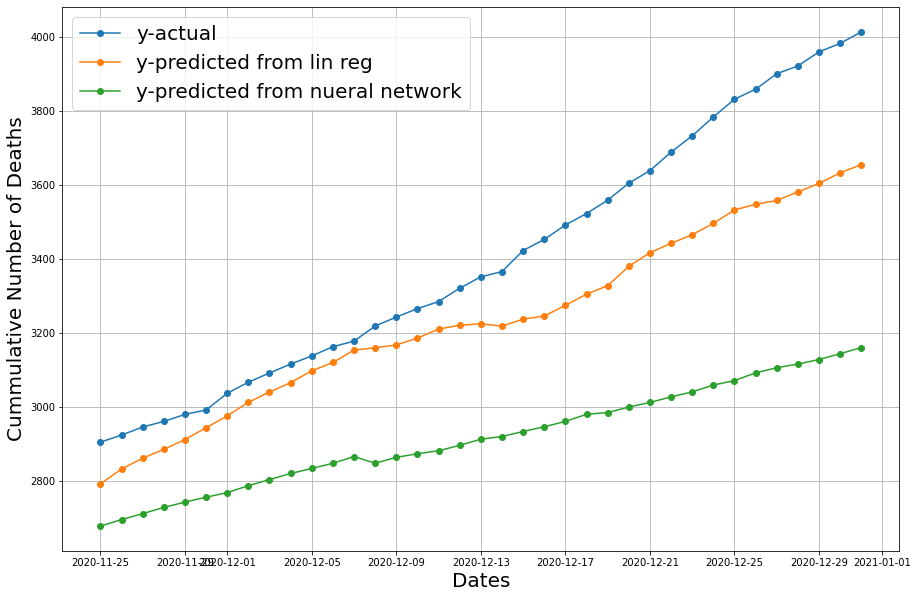

In [16]:
dts = df_punjab['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_punjab, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_punjab, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [17]:
# ISLAMABAD : 

Saving Islamabad_Updated.csv to Islamabad_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64       

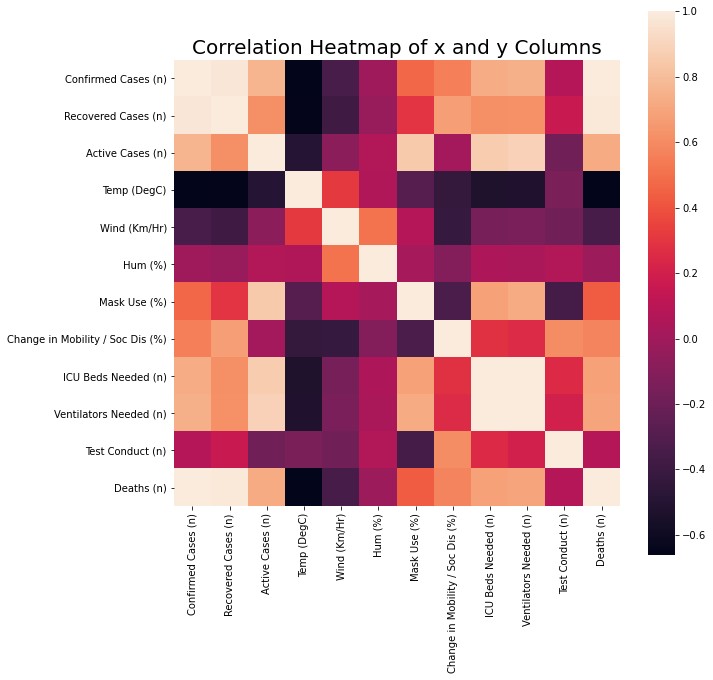

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.978309,0.764872,-0.660675,-0.337252,-0.008139,0.468139,0.552551,0.728386,0.741069,0.082614,0.997236
Recovered Cases (n),0.978309,1.000000,0.614838,-0.649295,-0.387515,-0.031312,0.298831,0.670844,0.615642,0.621907,0.160166,0.986917
Active Cases (n),0.764872,0.614838,1.000000,-0.496117,-0.079078,0.066238,0.852588,0.017945,0.858993,0.887778,-0.182558,0.727492
Temp (DegC),-0.660675,-0.649295,-0.496117,1.000000,0.315311,0.053169,-0.286177,-0.427721,-0.529994,-0.523093,-0.138297,-0.659912
Wind (Km/Hr),-0.337252,-0.387515,-0.079078,0.315311,1.000000,0.512933,0.073058,-0.421909,-0.158655,-0.147749,-0.184401,-0.346597
Hum (%),-0.008139,-0.031312,0.066238,0.053169,0.512933,1.000000,0.023719,-0.106163,0.050492,0.045761,0.069199,-0.012279
Mask Use (%),0.468139,0.298831,0.852588,-0.286177,0.073058,0.023719,1.000000,-0.330577,0.688619,0.721565,-0.359286,0.434724
Change in Mobility / Soc Dis (%),0.552551,0.670844,0.017945,-0.427721,-0.421909,-0.106163,-0.330577,1.000000,0.285907,0.254222,0.608343,0.572278
ICU Beds Needed (n),0.728386,0.615642,0.858993,-0.529994,-0.158655,0.050492,0.688619,0.285907,1.000000,0.996650,0.249360,0.688213
Ventilators Needed (n),0.741069,0.621907,0.887778,-0.523093,-0.147749,0.045761,0.721565,0.254222,0.996650,1.000000,0.203673,0.700026


In [18]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_isl = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_isl.info());
print('\n')
print(df_isl.describe())

dff = df_isl.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [19]:
# data pre processing 

x = df_isl.iloc[:, 2:-1]
y = df_isl.iloc[:, -1] 

x = x.drop(['Hum (%)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [20]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [291 297 305 307 309 314 318 324 329 332 334 340 341 341 345 348 353 358
 368 371 377 379 381 385 388 389 391 393 394 398 402 404 404 407 412 415
 416]

 Predicted-y using lin reg: 
 [288.39 293.64 298.14 301.5  304.48 308.3  311.61 315.68 319.96 324.73
 328.27 333.32 336.65 339.17 342.81 346.17 350.08 354.05 358.97 362.29
 365.84 367.92 371.01 374.49 377.37 379.81 381.66 383.82 385.06 387.52
 389.32 390.86 392.28 394.21 396.4  399.03 401.39]

Accuracy obt from lin reg model :  98.0  %


In [21]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 135.3707 - mean_squared_error: 24510.4244
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 31.2294 - mean_squared_error: 1647.2672
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 25.9075 - mean_squared_error: 926.7810
Epoch 4/250
30/30 [================

In [22]:
ypred = model.predict(xts)

ya_isl = np.array(yts)
yp_isl = np.array(ypred)

print('\nya_isl ~vs~ yp_isl')
for i in range(len(yts)): 
  print(ya_isl[[i]],'vs',yp_isl[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_isl[i]-yp_isl[i])/ya_isl[i])

err_isl = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_isl,2))*100,' %')


ya_isl ~vs~ yp_isl
[291] vs [291.44592]
[297] vs [296.94907]
[305] vs [301.1662]
[307] vs [305.58844]
[309] vs [309.98685]
[314] vs [314.029]
[318] vs [318.2328]
[324] vs [322.63403]
[329] vs [327.69687]
[332] vs [333.2934]
[334] vs [337.75916]
[340] vs [342.8731]
[341] vs [346.5244]
[341] vs [349.26514]
[345] vs [352.5642]
[348] vs [355.5177]
[353] vs [358.8354]
[358] vs [362.71365]
[368] vs [366.6731]
[371] vs [369.89792]
[377] vs [372.62204]
[379] vs [374.9681]
[381] vs [378.5489]
[385] vs [382.31644]
[388] vs [385.6784]
[389] vs [389.23148]
[391] vs [391.63306]
[393] vs [395.1388]
[394] vs [397.78424]
[398] vs [400.58105]
[402] vs [402.72827]
[404] vs [404.54987]
[404] vs [406.27197]
[407] vs [408.70673]
[412] vs [411.6271]
[415] vs [416.30725]
[416] vs [419.44275]

Accuracy obt from deep nueral network :  99.0  %


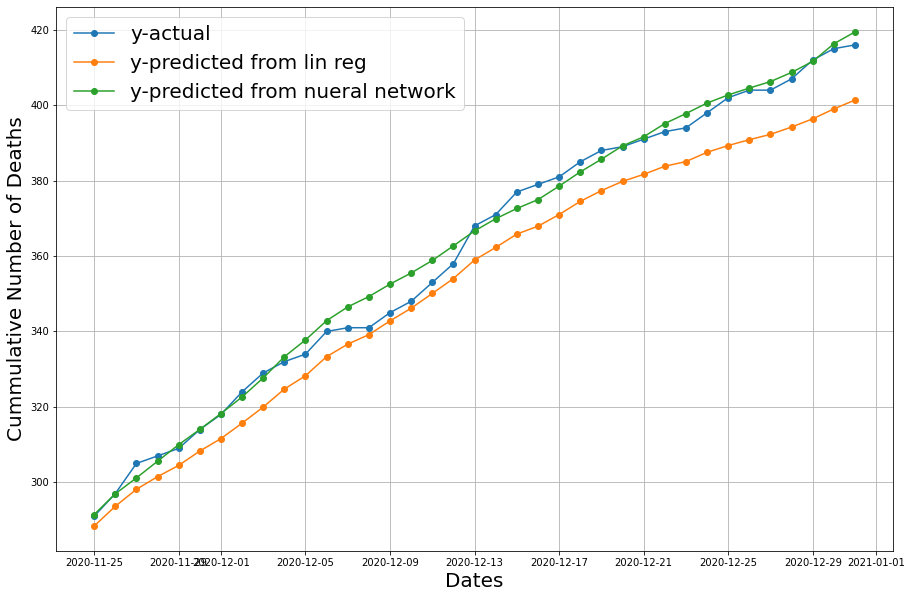

In [23]:
dts = df_isl['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_isl, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_isl, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [24]:
# SINDH : 

Saving Sindh_Updated.csv to Sindh_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64       
 10  IC

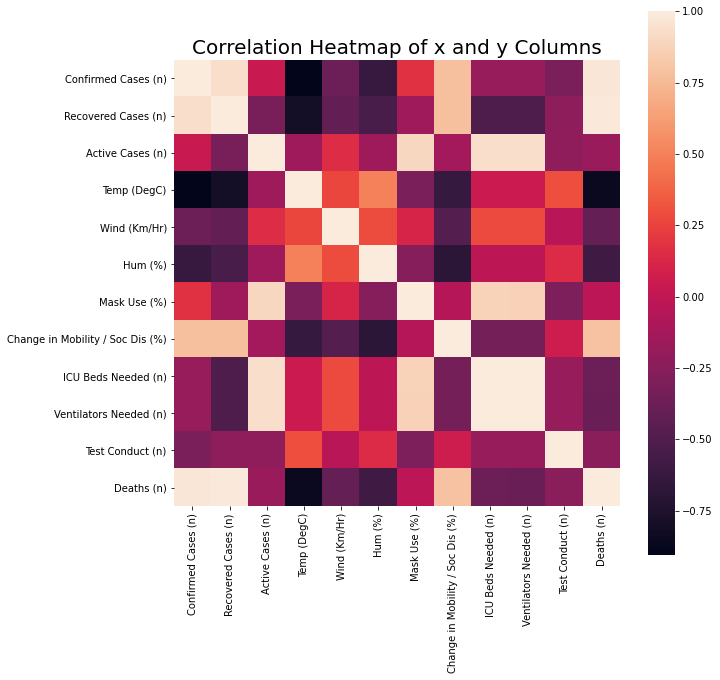

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.935021,0.035051,-0.904919,-0.382411,-0.625101,0.177644,0.777362,-0.187919,-0.188395,-0.315014,0.976899
Recovered Cases (n),0.935021,1.000000,-0.321601,-0.801412,-0.417676,-0.536580,-0.150911,0.781893,-0.510640,-0.512061,-0.221587,0.986466
Active Cases (n),0.035051,-0.321601,1.000000,-0.157657,0.156043,-0.156775,0.900068,-0.128070,0.937572,0.940301,-0.217488,-0.171758
Temp (DegC),-0.904919,-0.801412,-0.157657,1.000000,0.265226,0.496961,-0.311869,-0.630523,0.042125,0.045694,0.295650,-0.858408
Wind (Km/Hr),-0.382411,-0.417676,0.156043,0.265226,1.000000,0.289948,0.110478,-0.481479,0.285007,0.282688,-0.040882,-0.410563
Hum (%),-0.625101,-0.536580,-0.156775,0.496961,0.289948,1.000000,-0.262453,-0.689004,-0.013240,-0.012147,0.151139,-0.589177
Mask Use (%),0.177644,-0.150911,0.900068,-0.311869,0.110478,-0.262453,1.000000,-0.059306,0.878043,0.870770,-0.295185,-0.020186
Change in Mobility / Soc Dis (%),0.777362,0.781893,-0.128070,-0.630523,-0.481479,-0.689004,-0.059306,1.000000,-0.337082,-0.337171,0.060925,0.797565
ICU Beds Needed (n),-0.187919,-0.510640,0.937572,0.042125,0.285007,-0.013240,0.878043,-0.337082,1.000000,0.999401,-0.187994,-0.383287
Ventilators Needed (n),-0.188395,-0.512061,0.940301,0.045694,0.282688,-0.012147,0.870770,-0.337171,0.999401,1.000000,-0.184641,-0.384162


In [25]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_sindh = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_sindh.info());
print('\n')
print(df_sindh.describe())

dff = df_sindh.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [26]:
# data pre processing 

x = df_sindh.iloc[:, 2:-1]
y = df_sindh.iloc[:, -1] 

x = x.drop(['Mask Use (%)','Active Cases (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [27]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [2858 2866 2885 2897 2911 2924 2935 2962 2968 2983 2991 3011 3019 3060
 3081 3099 3109 3132 3149 3158 3164 3222 3237 3270 3302 3319 3333 3352
 3379 3419 3440 3462 3469 3491 3502 3520 3533]

 Predicted-y using lin reg: 
 [2879.71 2910.74 2946.92 2951.   2982.39 3018.68 3054.86 3086.81 3131.76
 3174.32 3210.41 3231.62 3253.63 3285.54 3313.06 3338.06 3363.28 3374.13
 3382.73 3406.04 3414.48 3440.12 3484.05 3509.88 3551.31 3585.83 3604.71
 3628.26 3642.38 3659.83 3679.62 3690.45 3710.81 3704.27 3703.81 3741.57
 3773.68]

Accuracy obt from lin reg model :  94.0  %


In [28]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 700.1633 - mean_squared_error: 816177.7772
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 182.4679 - mean_squared_error: 42515.7303
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 93.1700 - mean_squared_error: 14007.8738
Epoch 4/250
30/30 [===========

In [29]:
ypred = model.predict(xts)

ya_sindh = np.array(yts)
yp_sindh = np.array(ypred)

print('\nya_sindh ~vs~ yp_sindh')
for i in range(len(yts)): 
  print(ya_sindh[[i]],'vs',yp_sindh[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_sindh[i]-yp_sindh[i])/ya_sindh[i])

err_sindh = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_sindh,2))*100,' %')


ya_sindh ~vs~ yp_sindh
[2858] vs [2927.319]
[2866] vs [2944.0747]
[2885] vs [2964.4812]
[2897] vs [2979.8047]
[2911] vs [3007.5098]
[2924] vs [3027.4714]
[2935] vs [3050.437]
[2962] vs [3072.9097]
[2968] vs [3097.8342]
[2983] vs [3133.1235]
[2991] vs [3159.044]
[3011] vs [3185.675]
[3019] vs [3212.8687]
[3060] vs [3247.5776]
[3081] vs [3275.5044]
[3099] vs [3310.12]
[3109] vs [3338.9048]
[3132] vs [3364.4363]
[3149] vs [3391.6475]
[3158] vs [3419.3164]
[3164] vs [3443.4097]
[3222] vs [3473.3083]
[3237] vs [3541.1462]
[3270] vs [3568.1023]
[3302] vs [3593.5342]
[3319] vs [3609.942]
[3333] vs [3625.579]
[3352] vs [3638.576]
[3379] vs [3667.8027]
[3419] vs [3681.8267]
[3440] vs [3693.772]
[3462] vs [3704.9282]
[3469] vs [3716.0044]
[3491] vs [3725.7808]
[3502] vs [3738.1726]
[3520] vs [3776.213]
[3533] vs [3822.545]

Accuracy obt from deep nueral network :  94.0  %


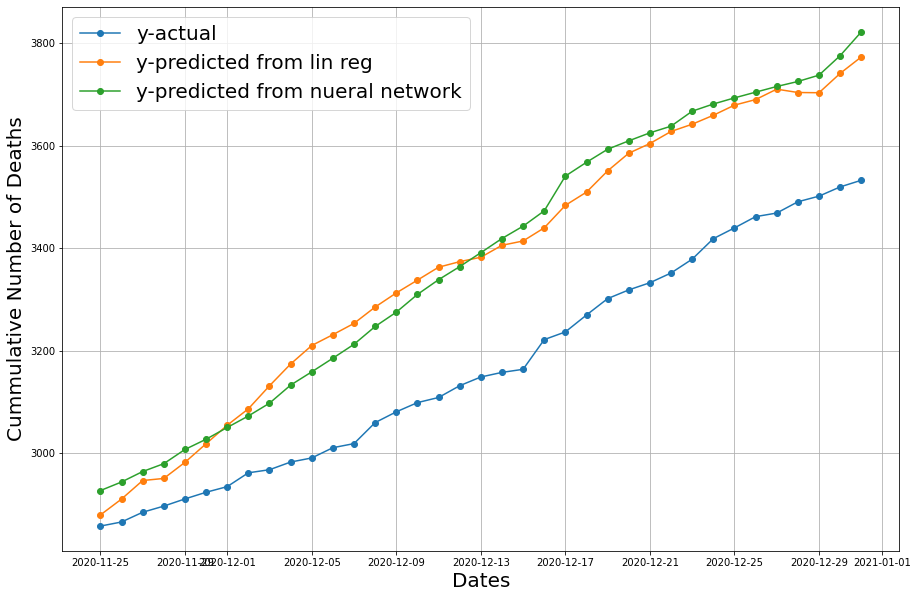

In [30]:
dts = df_sindh['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_sindh, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_sindh, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [31]:
# GILGIT-BALTISTAN : 

Saving Gilgitt-Baltistan_Updated.csv to Gilgitt-Baltistan_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null  

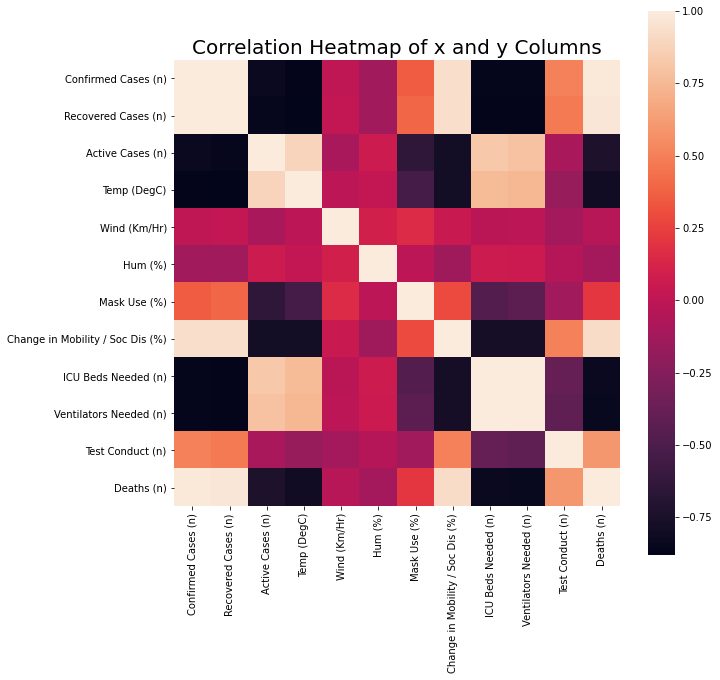

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.998864,-0.830007,-0.866184,0.007733,-0.128965,0.360983,0.939186,-0.860640,-0.861311,0.505470,0.983153
Recovered Cases (n),0.998864,1.000000,-0.855614,-0.879854,0.016089,-0.125635,0.391100,0.938901,-0.869076,-0.867436,0.476747,0.975095
Active Cases (n),-0.830007,-0.855614,1.000000,0.887570,-0.101170,0.065430,-0.645204,-0.789093,0.826487,0.800815,-0.095015,-0.737703
Temp (DegC),-0.866184,-0.879854,0.887570,1.000000,-0.009694,0.021005,-0.535309,-0.785727,0.764146,0.747576,-0.168902,-0.795200
Wind (Km/Hr),0.007733,0.016089,-0.101170,-0.009694,1.000000,0.095895,0.161420,0.048815,-0.016898,-0.006968,-0.113588,-0.030993
Hum (%),-0.128965,-0.125635,0.065430,0.021005,0.095895,1.000000,-0.008198,-0.139638,0.061616,0.055649,-0.040869,-0.117701
Mask Use (%),0.360983,0.391100,-0.645204,-0.535309,0.161420,-0.008198,1.000000,0.293887,-0.472333,-0.430152,-0.124894,0.212988
Change in Mobility / Soc Dis (%),0.939186,0.938901,-0.789093,-0.785727,0.048815,-0.139638,0.293887,1.000000,-0.771925,-0.770264,0.507731,0.922807
ICU Beds Needed (n),-0.860640,-0.869076,0.826487,0.764146,-0.016898,0.061616,-0.472333,-0.771925,1.000000,0.997691,-0.380647,-0.826309
Ventilators Needed (n),-0.861311,-0.867436,0.800815,0.747576,-0.006968,0.055649,-0.430152,-0.770264,0.997691,1.000000,-0.410365,-0.837396


In [32]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_gb = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_gb.info());
print('\n')
print(df_gb.describe())

dff = df_gb.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [33]:
# data pre processing 

x = df_gb.iloc[:, 2:-1]
y = df_gb.iloc[:, -1] 

x = x.drop(['Wind (Km/Hr)','Hum (%)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [34]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [ 96  96  96  97  97  97  97  97  97  98  98  98  98  98  98  98  98  98
  99  99  99  99  99  99  99  99  99  99  99  99 101 101 101 101 101 101
 101]

 Predicted-y using lin reg: 
 [ 96.  96.  96.  97.  97.  97.  97.  97.  97.  98.  98.  98.  98.  98.
  98.  98.  98.  98.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.
  99.  99. 101. 101. 101. 101. 101. 101. 101.]

Accuracy obt from lin reg model :  100.0  %


In [35]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 24.5781 - mean_squared_error: 955.8638
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 13.9290 - mean_squared_error: 268.8820
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 10.5308 - mean_squared_error: 161.1052
Epoch 4/250
30/30 [====================

In [36]:
ypred = model.predict(xts)

ya_gb = np.array(yts)
yp_gb = np.array(ypred)

print('\nya_gb ~vs~ yp_gb')
for i in range(len(yts)): 
  print(ya_gb[[i]],'vs',yp_gb[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_gb[i]-yp_gb[i])/ya_gb[i])

err_gb = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_gb,2))*100,' %')


ya_gb ~vs~ yp_gb
[96] vs [93.351036]
[96] vs [93.96304]
[96] vs [94.89982]
[97] vs [94.59963]
[97] vs [95.50263]
[97] vs [95.266426]
[97] vs [95.86679]
[97] vs [95.67717]
[97] vs [96.30968]
[98] vs [94.854904]
[98] vs [94.771164]
[98] vs [95.13226]
[98] vs [95.02256]
[98] vs [95.26169]
[98] vs [95.03588]
[98] vs [94.70327]
[98] vs [93.869]
[98] vs [93.136955]
[99] vs [92.86852]
[99] vs [93.36893]
[99] vs [92.5777]
[99] vs [91.79514]
[99] vs [92.042656]
[99] vs [92.2024]
[99] vs [92.06594]
[99] vs [92.280876]
[99] vs [93.511955]
[99] vs [92.84208]
[99] vs [92.92084]
[99] vs [93.25228]
[101] vs [92.67984]
[101] vs [92.8843]
[101] vs [93.020905]
[101] vs [93.12443]
[101] vs [92.98696]
[101] vs [92.915794]
[101] vs [93.3073]

Accuracy obt from deep nueral network :  95.0  %


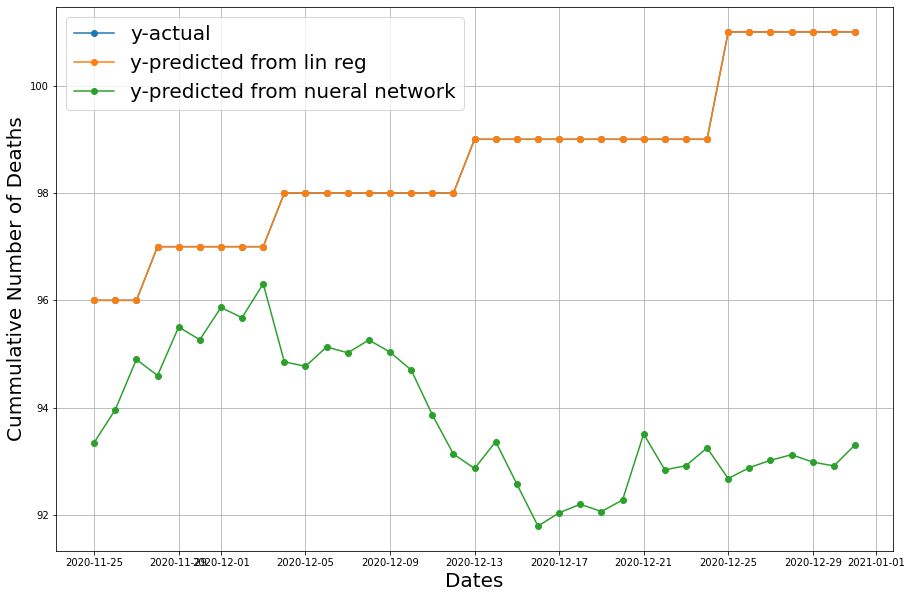

In [37]:
dts = df_gb['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_gb, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_gb, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [38]:
# AZAD JAMMU AND KASHMIR : 

Saving Azad Jammu and Kashmir_Updated.csv to Azad Jammu and Kashmir_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 

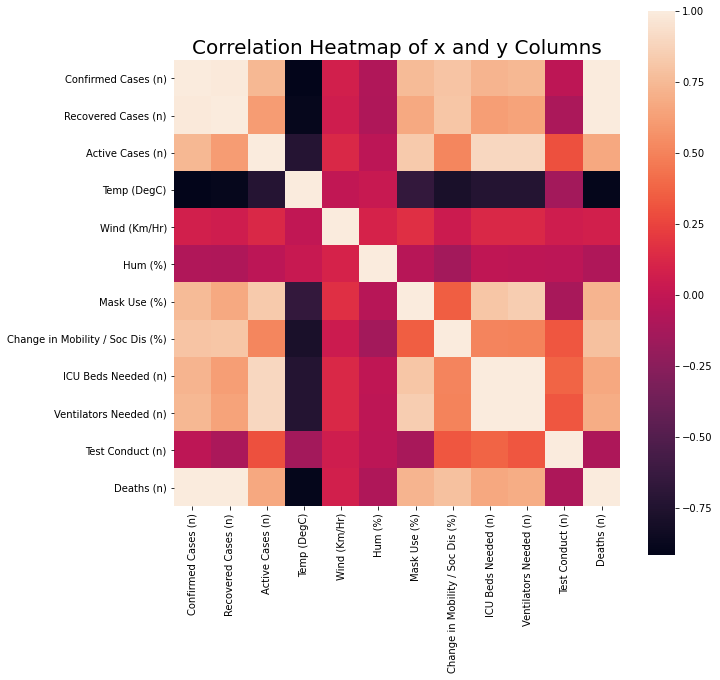

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.986231,0.739755,-0.915117,0.077383,-0.084695,0.753710,0.799224,0.725127,0.741745,-0.022859,0.993004
Recovered Cases (n),0.986231,1.000000,0.618301,-0.891171,0.058018,-0.091209,0.674850,0.807445,0.625825,0.645131,-0.099996,0.995086
Active Cases (n),0.739755,0.618301,1.000000,-0.724221,0.130798,-0.031023,0.833783,0.514855,0.900049,0.899904,0.301402,0.669908
Temp (DegC),-0.915117,-0.891171,-0.724221,1.000000,-0.009694,0.021005,-0.656053,-0.785727,-0.732498,-0.734754,-0.137141,-0.892793
Wind (Km/Hr),0.077383,0.058018,0.130798,-0.009694,1.000000,0.095895,0.167554,0.048815,0.126484,0.130961,0.059175,0.073944
Hum (%),-0.084695,-0.091209,-0.031023,0.021005,0.095895,1.000000,-0.051715,-0.139638,-0.011040,-0.018535,-0.030956,-0.091795
Mask Use (%),0.753710,0.674850,0.833783,-0.656053,0.167554,-0.051715,1.000000,0.352953,0.811860,0.846636,-0.115927,0.729416
Change in Mobility / Soc Dis (%),0.799224,0.807445,0.514855,-0.785727,0.048815,-0.139638,0.352953,1.000000,0.510267,0.499403,0.325533,0.789008
ICU Beds Needed (n),0.725127,0.625825,0.900049,-0.732498,0.126484,-0.011040,0.811860,0.510267,1.000000,0.996392,0.377910,0.666536
Ventilators Needed (n),0.741745,0.645131,0.899904,-0.734754,0.130961,-0.018535,0.846636,0.499403,0.996392,1.000000,0.323302,0.689579


In [39]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_ajk = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_ajk.info());
print('\n')
print(df_ajk.describe())

dff = df_ajk.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [40]:
# data pre processing 

x = df_ajk.iloc[:, 2:-1]
y = df_ajk.iloc[:, -1] 

x = x.drop(['Wind (Km/Hr)','Hum (%)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 8)
y data shape :  (183,)


x-train data shape :  (146, 8)
x-test data shape :  (37, 8)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [41]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [151 152 155 161 164 165 169 173 173 174 175 177 181 182 182 183 186 188
 191 191 191 193 194 200 203 204 206 210 211 211 213 214 216 218 219 220
 221]

 Predicted-y using lin reg: 
 [151. 152. 155. 161. 164. 165. 169. 173. 173. 174. 175. 177. 181. 182.
 182. 183. 186. 188. 191. 191. 191. 193. 194. 200. 203. 204. 206. 210.
 211. 211. 213. 214. 216. 218. 219. 220. 221.]

Accuracy obt from lin reg model :  100.0  %


In [42]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 37.8338 - mean_squared_error: 2410.0211
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 13.8262 - mean_squared_error: 262.6987
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 6.5289 - mean_squared_error: 71.2130
Epoch 4/250
30/30 [=====================

In [43]:
ypred = model.predict(xts)

ya_ajk = np.array(yts)
yp_ajk = np.array(ypred)

print('\nya_ajk ~vs~ yp_ajk')
for i in range(len(yts)): 
  print(ya_ajk[[i]],'vs',yp_ajk[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_ajk[i]-yp_ajk[i])/ya_ajk[i])

err_ajk = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_ajk,2))*100,' %')


ya_ajk ~vs~ yp_ajk
[151] vs [139.42598]
[152] vs [141.17775]
[155] vs [143.16225]
[161] vs [143.58835]
[164] vs [146.84068]
[165] vs [150.48672]
[169] vs [152.07782]
[173] vs [152.67485]
[173] vs [154.61815]
[174] vs [156.15181]
[175] vs [157.57225]
[177] vs [158.78102]
[181] vs [160.43135]
[182] vs [161.04712]
[182] vs [162.04872]
[183] vs [164.04102]
[186] vs [165.70628]
[188] vs [166.35263]
[191] vs [170.66185]
[191] vs [175.46063]
[191] vs [179.45212]
[193] vs [183.61095]
[194] vs [187.65044]
[200] vs [191.74605]
[203] vs [195.84666]
[204] vs [199.18549]
[206] vs [203.17104]
[210] vs [204.22662]
[211] vs [205.64148]
[211] vs [207.22543]
[213] vs [208.63524]
[214] vs [210.22404]
[216] vs [211.3453]
[218] vs [212.911]
[219] vs [213.85135]
[220] vs [214.346]
[221] vs [215.4204]

Accuracy obt from deep nueral network :  93.0  %


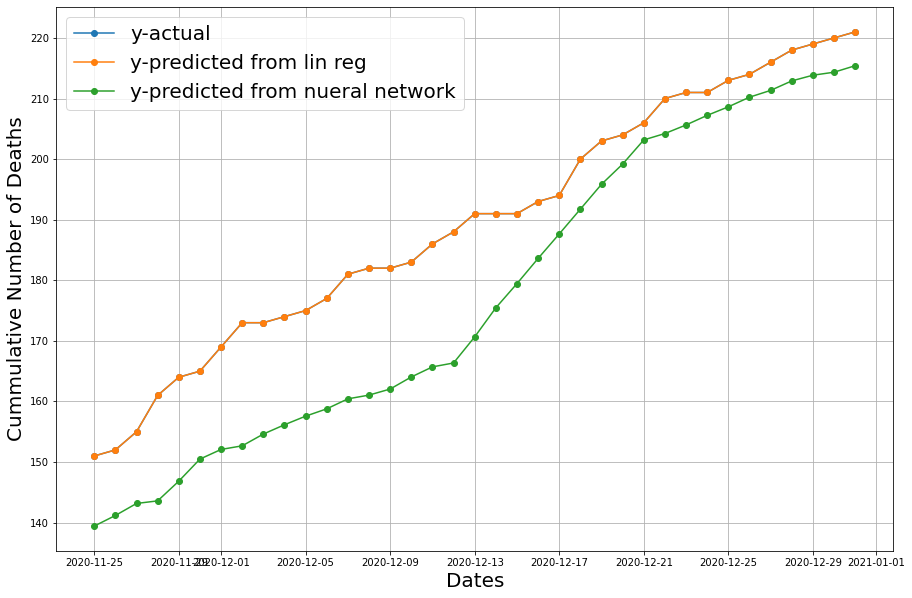

In [44]:
dts = df_ajk['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_ajk, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_ajk, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [45]:
# KHYBER PAKHTUNKHWA : 

Saving Khyber Pakhtunkhwa_Updated.csv to Khyber Pakhtunkhwa_Updated.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null

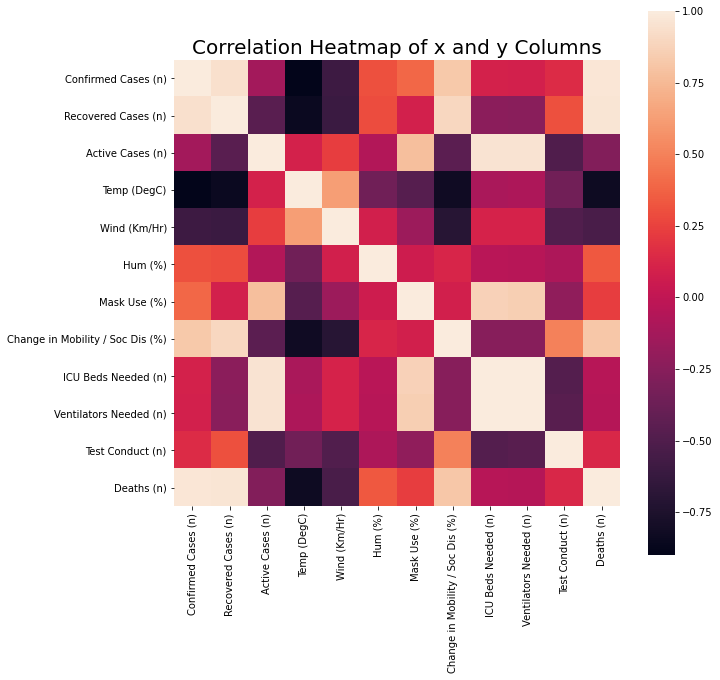

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.942039,-0.130114,-0.899242,-0.590806,0.303122,0.391897,0.829035,0.098706,0.089477,0.152333,0.976788
Recovered Cases (n),0.942039,1.000000,-0.455216,-0.842306,-0.609055,0.292956,0.088783,0.897812,-0.236708,-0.244883,0.308878,0.968901
Active Cases (n),-0.130114,-0.455216,1.000000,0.100665,0.228969,-0.062960,0.779137,-0.451022,0.961287,0.960932,-0.504389,-0.272235
Temp (DegC),-0.899242,-0.842306,0.100665,1.000000,0.628449,-0.352448,-0.475687,-0.821683,-0.099624,-0.088359,-0.350188,-0.830296
Wind (Km/Hr),-0.590806,-0.609055,0.228969,0.628449,1.000000,0.087230,-0.157850,-0.699907,0.107976,0.107526,-0.498403,-0.533637
Hum (%),0.303122,0.292956,-0.062960,-0.352448,0.087230,1.000000,0.058599,0.119217,-0.031455,-0.041613,-0.088060,0.335253
Mask Use (%),0.391897,0.088783,0.779137,-0.475687,-0.157850,0.058599,1.000000,0.086736,0.868862,0.858207,-0.211309,0.228583
Change in Mobility / Soc Dis (%),0.829035,0.897812,-0.451022,-0.821683,-0.699907,0.119217,0.086736,1.000000,-0.247432,-0.250399,0.497816,0.814560
ICU Beds Needed (n),0.098706,-0.236708,0.961287,-0.099624,0.107976,-0.031455,0.868862,-0.247432,1.000000,0.999329,-0.476564,-0.042663
Ventilators Needed (n),0.089477,-0.244883,0.960932,-0.088359,0.107526,-0.041613,0.858207,-0.250399,0.999329,1.000000,-0.468154,-0.050971


In [46]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_kpk = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_kpk.info());
print('\n')
print(df_kpk.describe())

dff = df_kpk.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [47]:
# data pre processing 

x = df_kpk.iloc[:, 2:-1]
y = df_kpk.iloc[:, -1] 

x = x.drop(['ICU Beds Needed (n)','Ventilators Needed (n)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 8)
y data shape :  (183,)


x-train data shape :  (146, 8)
x-test data shape :  (37, 8)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [48]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [1339 1344 1346 1355 1359 1368 1369 1375 1378 1389 1399 1404 1413 1419
 1429 1439 1450 1455 1463 1473 1477 1489 1502 1511 1521 1536 1546 1553
 1563 1577 1585 1596 1602 1609 1617 1627 1638]

 Predicted-y using lin reg: 
 [1339.28 1344.37 1346.43 1355.41 1359.39 1368.44 1369.46 1375.53 1378.53
 1389.43 1399.45 1404.54 1413.53 1419.64 1429.68 1439.66 1450.61 1455.66
 1463.72 1473.68 1477.71 1489.66 1502.6  1511.6  1521.63 1536.65 1546.66
 1553.67 1563.62 1577.54 1585.56 1596.54 1602.88 1609.53 1617.58 1627.5
 1638.52]

Accuracy obt from lin reg model :  100.0  %


In [49]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 539.6215 - mean_squared_error: 441891.8110
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 91.4297 - mean_squared_error: 12950.9048
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 93.0815 - mean_squared_error: 11864.1224
Epoch 4/250
30/30 [============

In [50]:
ypred = model.predict(xts)

ya_kpk = np.array(yts)
yp_kpk = np.array(ypred)

print('\nya_kpk ~vs~ yp_kpk')
for i in range(len(yts)): 
  print(ya_kpk[[i]],'vs',yp_kpk[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_kpk[i]-yp_kpk[i])/ya_kpk[i])

err_kpk = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_kpk,2))*100,' %')


ya_kpk ~vs~ yp_kpk
[1339] vs [1501.5862]
[1344] vs [1515.4426]
[1346] vs [1526.415]
[1355] vs [1534.3855]
[1359] vs [1543.9163]
[1368] vs [1555.0632]
[1369] vs [1562.6355]
[1375] vs [1574.302]
[1378] vs [1578.8848]
[1389] vs [1584.3849]
[1399] vs [1596.245]
[1404] vs [1614.0535]
[1413] vs [1632.3286]
[1419] vs [1653.7543]
[1429] vs [1666.4855]
[1439] vs [1672.4457]
[1450] vs [1680.756]
[1455] vs [1695.8608]
[1463] vs [1715.3124]
[1473] vs [1723.7847]
[1477] vs [1738.153]
[1489] vs [1743.6562]
[1502] vs [1752.0549]
[1511] vs [1758.32]
[1521] vs [1775.0679]
[1536] vs [1792.8503]
[1546] vs [1804.251]
[1553] vs [1811.0193]
[1563] vs [1822.2992]
[1577] vs [1830.2161]
[1585] vs [1843.9834]
[1596] vs [1855.2698]
[1602] vs [1883.8071]
[1609] vs [1874.4071]
[1617] vs [1880.895]
[1627] vs [1881.3796]
[1638] vs [1893.14]

Accuracy obt from deep nueral network :  84.0  %


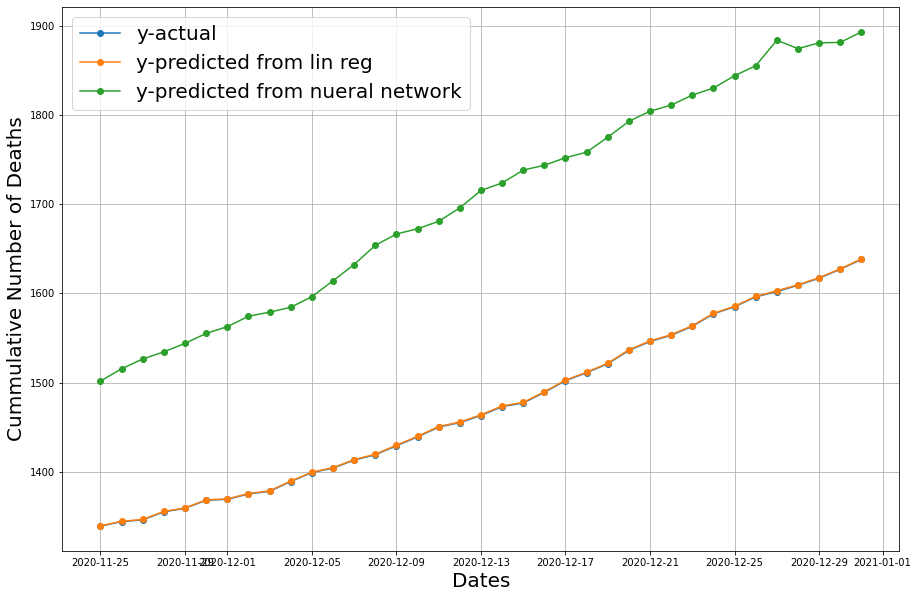

In [51]:
dts = df_kpk['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_kpk, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_kpk, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 